## Steps:-
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [84]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [85]:
pd.set_option('display.max_columns', 500)

# Reading and understanding the data

In [86]:
# Reading the dataset
data = pd.read_csv('Credit_Scoring.csv')
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846,94.562648,4.200000
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658,60.313631,4.980000
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985,67.001675,1.980000
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325,67.924528,7.933333
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910,34.065934,7.083871


In [4]:
data.shape

(4446, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Status     4446 non-null   object 
 1   Seniority  4446 non-null   int64  
 2   Home       4446 non-null   object 
 3   Time       4446 non-null   int64  
 4   Age        4446 non-null   int64  
 5   Marital    4446 non-null   object 
 6   Records    4446 non-null   object 
 7   Job        4446 non-null   object 
 8   Expenses   4446 non-null   int64  
 9   Income     4446 non-null   int64  
 10  Assets     4446 non-null   int64  
 11  Debt       4446 non-null   int64  
 12  Amount     4446 non-null   int64  
 13  Price      4446 non-null   int64  
 14  Finrat     4446 non-null   float64
 15  Savings    4446 non-null   float64
dtypes: float64(2), int64(9), object(5)
memory usage: 555.9+ KB


In [6]:
data.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


## Handling missing values

#### Handling missing values in columns

In [87]:
# Checking if any Missing Values are there in the Dataset
data.isnull().any()

Status       False
Seniority    False
Home         False
Time         False
Age          False
Marital      False
Records      False
Job          False
Expenses     False
Income       False
Assets       False
Debt         False
Amount       False
Price        False
Finrat       False
Savings      False
dtype: bool

In [88]:
# Checking if any categorical Features are there in the Dataset
categorical_data = data.select_dtypes(exclude=[np.number])
print ("There are {} categorical Columns in Dataset".format(categorical_data))

There are      Status   Home  Marital  Records        Job
0      good   rent  married   no_rec  freelance
1      good   rent    widow   no_rec      fixed
2       bad  owner  married  yes_rec  freelance
3      good   rent   single   no_rec      fixed
4      good   rent   single   no_rec      fixed
...     ...    ...      ...      ...        ...
4441    bad   rent  married   no_rec      fixed
4442   good  owner  married   no_rec      fixed
4443    bad  owner  married   no_rec    partime
4444   good   rent   single   no_rec  freelance
4445   good  owner  married   no_rec  freelance

[4446 rows x 5 columns] categorical Columns in Dataset


In [90]:
# Name of all the Categorical Features Present in the Dataset
categorical_data.any()

Status     True
Home       True
Marital    True
Records    True
Job        True
dtype: bool

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
data['Status'] = encoder.fit_transform(data['Status'].astype('str'))
data['Home'] = encoder.fit_transform(data['Home'].astype('str'))
data['Marital'] = encoder.fit_transform(data['Marital'].astype('str'))
data['Job'] = encoder.fit_transform(data['Job'].astype('str'))
data['Records'] = encoder.fit_transform(data['Records'].astype('str'))

In [92]:
#Checking Data Types of the Features for Confirmation
data.dtypes

Status         int64
Seniority      int64
Home           int64
Time           int64
Age            int64
Marital        int64
Records        int64
Job            int64
Expenses       int64
Income         int64
Assets         int64
Debt           int64
Amount         int64
Price          int64
Finrat       float64
Savings      float64
dtype: object

In [93]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,1,9,5,60,30,1,0,1,73,129,0,0,800,846,94.562648,4.200000
1,1,17,5,60,58,4,0,0,48,131,0,0,1000,1658,60.313631,4.980000
2,0,10,2,36,46,1,1,1,90,200,3000,0,2000,2985,67.001675,1.980000
3,1,0,5,60,24,3,0,0,63,182,2500,0,900,1325,67.924528,7.933333
4,1,0,5,36,26,3,0,0,46,107,0,0,310,910,34.065934,7.083871


In [94]:
# Value Counts of 'GOOD' Status and 'BAD' Status
# 'GOOD': 1 and 'BAD': 0
data.Status.value_counts()

Status
1    3197
0    1249
Name: count, dtype: int64

In [95]:
X = data.drop('Status', axis=1)
y = data[['Status']]

In [96]:
X

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,9,5,60,30,1,0,1,73,129,0,0,800,846,94.562648,4.200000
1,17,5,60,58,4,0,0,48,131,0,0,1000,1658,60.313631,4.980000
2,10,2,36,46,1,1,1,90,200,3000,0,2000,2985,67.001675,1.980000
3,0,5,60,24,3,0,0,63,182,2500,0,900,1325,67.924528,7.933333
4,0,5,36,26,3,0,0,46,107,0,0,310,910,34.065934,7.083871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,1,5,60,39,1,0,0,69,92,0,0,900,1020,88.235294,1.533333
4442,22,2,60,46,1,0,0,60,75,3000,600,950,1263,75.217736,0.568421
4443,0,2,24,37,1,0,3,60,90,3500,0,500,963,51.921080,1.440000
4444,0,5,48,23,3,0,1,49,140,0,0,550,550,100.000000,7.941818


In [97]:
y

,Status
0,1
1,1
2,0
3,1
4,1
...,...
4441,0
4442,1
4443,0
4444,1


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [100]:
lr = LogisticRegression().fit(X_train, y_train)
print(f'Accuracy: {lr.score(X_test, y_test)}')

Accuracy: 0.8033707865168539


In [101]:
y_pred = lr.predict(X_test)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.49      0.58       252
           1       0.82      0.93      0.87       638

    accuracy                           0.80       890
   macro avg       0.77      0.71      0.73       890
weighted avg       0.79      0.80      0.79       890



In [103]:
confusion_matrix(y_test, y_pred)

array([[123, 129],
       [ 46, 592]])

In [104]:
TN = confusion_matrix(y_test, y_pred)[1,1] # true negative 
TP = confusion_matrix(y_test, y_pred)[0,0] # true postives
FP = confusion_matrix(y_test, y_pred)[0,1] # false positives
FN = confusion_matrix(y_test, y_pred)[1,0] # false negatives

In [105]:
print(TN,TP,FP,FN)

592 123 129 46


In [106]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred), 2)

0.8

# Model with PCA

In [47]:
#Import PCA
from sklearn.decomposition import PCA

In [48]:
# Instantiate PCA
pca = PCA(random_state=42)

In [49]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [50]:
# Principal components
pca.components_

array([[ 0.31402338, -0.0917583 ,  0.14130784,  0.35887737, -0.3534052 ,
         0.11192156, -0.1808962 ,  0.29773773,  0.39599781,  0.23866192,
         0.10468514,  0.33553006,  0.32603776,  0.06193358,  0.19484976],
       [-0.25388884,  0.06220465,  0.43319854, -0.22828292,  0.12434161,
         0.06930927,  0.09767057, -0.11375148, -0.13849479, -0.04305853,
         0.03667549,  0.54193767,  0.28308342,  0.44293829, -0.23821521],
       [-0.21036399, -0.08359923,  0.02361205, -0.30321692,  0.36499426,
        -0.00830126, -0.00989523, -0.31197725,  0.48634607,  0.14094748,
         0.1214294 ,  0.02098068,  0.09502706, -0.08549917,  0.58104945],
       [-0.0490648 ,  0.42150942,  0.30062951, -0.04437459, -0.10908389,
         0.03177108, -0.13717021,  0.28514593,  0.19398664, -0.3969688 ,
        -0.18723231, -0.12638728, -0.39061587,  0.33805288,  0.31849246],
       [ 0.45183092, -0.36952344,  0.2903685 ,  0.18493846,  0.18864749,
        -0.19818352, -0.38023167, -0.42987223, 

In [51]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.16387868 0.30157467 0.40669676 0.50660753 0.58827229 0.6642387
 0.73086463 0.79446216 0.84893431 0.89450806 0.93292705 0.96235192
 0.98986982 0.99689684 1.        ]


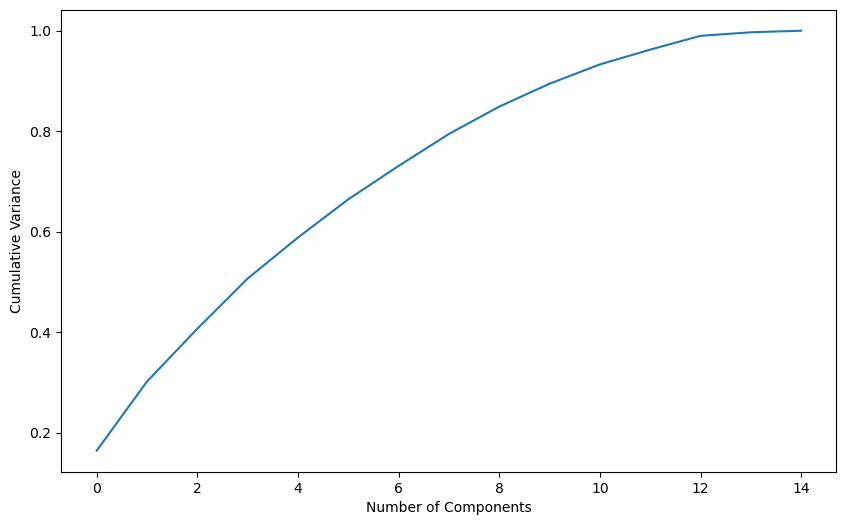

In [54]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [72]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
# Instantiate PCA with 10 components
pca_final = IncrementalPCA(n_components=10)

In [73]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [74]:
X_test_pca = pca_final.transform(X_test)

## Logistic regression with PCA

In [75]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [76]:
# Fit the model on the train set
lr_pca_model = lr.fit(X_train_pca, y_train)

In [77]:
# Predictions on the train set
y_train_pred = lr_pca_model.predict(X_train_pca)

In [78]:
# Prediction on the test set
y_test_pred = lr_pca_model.predict(X_test_pca)

In [79]:
TN = confusion_matrix(y_test, y_test_pred)[1,1] # true negative 
TP = confusion_matrix(y_test, y_test_pred)[0,0] # true postives
FP = confusion_matrix(y_test, y_test_pred)[0,1] # false positives
FN = confusion_matrix(y_test, y_test_pred)[1,0] # false negatives

print(TN,TP,FP,FN)

592 119 133 46


In [81]:
round(accuracy_score(y_test, y_test_pred), 3)

0.799

In [82]:
TN = confusion_matrix(y_train, y_train_pred)[1,1] # true negative 
TP = confusion_matrix(y_train, y_train_pred)[0,0] # true postives
FP = confusion_matrix(y_train, y_train_pred)[0,1] # false positives
FN = confusion_matrix(y_train, y_train_pred)[1,0] # false negatives

print(TN,TP,FP,FN)

2334 454 543 225
